In [1]:
from torchview import draw_graph
import sys
sys.path.append('..')
sys.path.append('../src')
from src.models.pamtan import PAMTAN
import torch

In [2]:
import torch
import torch.nn as nn
from collections import OrderedDict

class MultiBranchModel(nn.Module):
    def __init__(self, model):
        super(MultiBranchModel, self).__init__()

        self.backbone = model.backbone
        
        # Branch 1
        self.branch1 = model.heads[0]

        # Branch 2
        self.branch2 = model.heads[1]

        # Branch 3
        self.branch3 = model.heads[2]

        # Branch 4
        self.branch4 = model.heads[3]

        # Branch 5
        self.branch5 = model.heads[4]

    def forward(self, x):
        x = self.backbone(x)
        out1 = self.branch1(x)
        out2 = self.branch2(x)
        out3 = self.branch3(x)
        out4 = self.branch4(x)
        out5 = self.branch5(x)
        return out1, out2, out3, out4, out5



In [3]:
pnet = PAMTAN(attention="ham")

# Instantiate the model
model = MultiBranchModel(pnet)

11:42:24 - root - INFO - PedNet initialized with convnext-base backbone and ham module


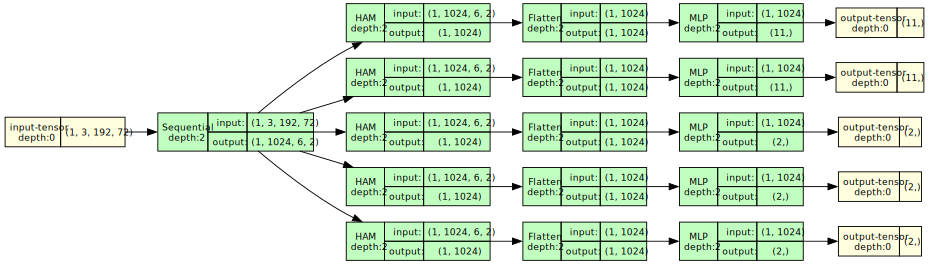

In [4]:
batch_size = 1
# device='meta' -> no memory is consumed for visualization
depth = 2
model_graph = draw_graph(model, graph_dir = 'LR', depth=depth, input_size=(batch_size, 3, *pnet.FINAL_RES), device='meta', filename=f'depth {depth}.png')
model_graph.visual_graph

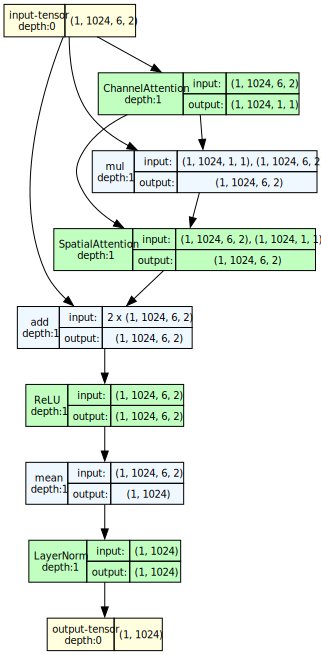

In [13]:
batch_size = 1
# device='meta' -> no memory is consumed for visualization
depth = 1
model_graph = draw_graph(pnet.heads[0].att, depth=depth, input_size=(batch_size, 1024, 6, 2), device='meta', filename=f'depth {depth}.png')
model_graph.visual_graph